In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
import pandas as pd
from plotting_utils import figure_path
from peak_utils import load_peaks, sample_cutoff, pileup_cutoff
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('RBP')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('font', **{'family':'sans-serif',
                  'sans-serif':'Arial'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
project_path = '/stor/work/Lambowitz/yaojun/Work/cfNA/tgirt_map'
peak_path = project_path + '/bed_files/merged_bed/MACS2/annotated'
peak_tsv = peak_path + '/unfragmented.filtered.new.tsv'
peaks_df = load_peaks(peak_tsv)\
    .query('sample_count >= %i & pileup >= %i' %(sample_cutoff, pileup_cutoff))
peaks_df.head()

,chrom,start,end,peakname,score,fc,log10p,log10q,pileup,sample_count,sense_gname,sense_gtype,strand,sense_overlapped,antisense_gname,antisense_gtype,antisense_overlapped,pvalue,FDR,is_sense
0,chr6,95156837,95156909,unfragmented.filtered.rvs_peak_23480,49739,1218.79724,4981.70361,4973.91650,1429.0,15.0,MTPAP,RBP,-,26,.,.,.,0.0,0.0,Sense
1,chr11,65273309,65273587,unfragmented.filtered.fwd_peak_5154,22302,531.51056,2237.73486,2230.29028,538.0,15.0,GTF2F1,RBP,+,125,TALAM1,Long RNA,278,0.0,0.0,Sense
2,chr16,24228399,24228506,unfragmented.filtered.fwd_peak_10583,15882,410.57184,1595.27893,1588.22900,420.0,14.0,GA-rich,Repeats,+,98,.,.,.,0.0,0.0,Sense
3,chr16,67844895,67845028,unfragmented.filtered.rvs_peak_10287,14847,370.41833,1491.71484,1484.75000,375.0,15.0,FLAM_C,Repeats,-,131,TSNAXIP1,Long RNA,133,0.0,0.0,Sense
4,chr19,11333579,11333670,unfragmented.filtered.rvs_peak_12880,14332,379.56116,1440.11218,1433.23572,390.0,15.0,EFTUD2,RBP,-,58,.,.,.,0.0,0.0,Sense


In [18]:
peaks_df.shape

(1036, 20)

In [31]:
RBP = peaks_df\
    .query('sense_gtype == "RBP"') \
    .pipe(lambda d: d[~d.sense_gname.str.contains(',')])
RBP.head()

,chrom,start,end,peakname,score,fc,log10p,log10q,pileup,sample_count,sense_gname,sense_gtype,strand,sense_overlapped,antisense_gname,antisense_gtype,antisense_overlapped,pvalue,FDR,is_sense
0,chr6,95156837,95156909,unfragmented.filtered.rvs_peak_23480,49739,1218.79724,4981.70361,4973.91650,1429.0,15.0,MTPAP,RBP,-,26,.,.,.,0.0,0.0,Sense
1,chr11,65273309,65273587,unfragmented.filtered.fwd_peak_5154,22302,531.51056,2237.73486,2230.29028,538.0,15.0,GTF2F1,RBP,+,125,TALAM1,Long RNA,278,0.0,0.0,Sense
4,chr19,11333579,11333670,unfragmented.filtered.rvs_peak_12880,14332,379.56116,1440.11218,1433.23572,390.0,15.0,EFTUD2,RBP,-,58,.,.,.,0.0,0.0,Sense
5,chrX,12994895,12995346,unfragmented.filtered.fwd_peak_30445,11437,318.51666,1150.45691,1143.78711,331.0,15.0,SRSF7,RBP,+,140,.,.,.,0.0,0.0,Sense
6,chr4,140222882,140222997,unfragmented.filtered.fwd_peak_22177,9262,275.12173,932.83197,926.23804,344.0,14.0,FXR2,RBP,+,92,NDUFC1,Long RNA,115,0.0,0.0,Sense


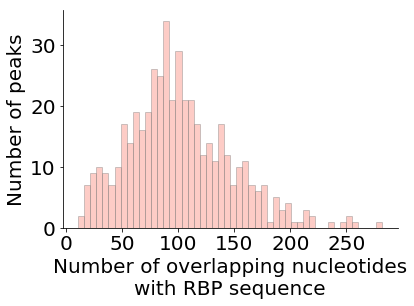

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(RBP.sense_overlapped.astype(int), 
        color='salmon',  bins=50, kde=False,
       hist_kws = {'histtype':'bar', 'ec':'gray'})
sns.despine()
ax.set_xlabel('Number of overlapping nucleotides\nwith RBP sequence')
ax.set_ylabel('Number of peaks')
xr = np.arange(0,282, 50)
ax.set_xticks(xr)
xt = ax.set_xticklabels(xr)
figname = figure_path + '/histogram_RBP.png'
plt.savefig(figname, bbox_inches='tight')
